# Validation of a binary mixture flow problem with a Low Mach Number approximation

In [1]:
from trustutils import run

run.introduction("Elie Saikali")
run.description("This document aims at validating the binary mixture flow problem of TRUST. Recall that this problem is used with a Low Mach Number (LMN) approximation and is only valid with iso-thermal and iso-bar conditions. The validation is carried out by injecting air into an axi-symmetrical cavity filled with air at rest (same properties for both species). Results are compared with those obtained by a non-compressible thermo-hydraulic problem (same physical parameters are used). The results in both cases are coherent as expected. For completeness, the influence of using of an explicit or a semi-implicit Rational Runge-Kutta (RRK2) time-integration scheme is also investigated for both cases.")
run.TRUST_parameters("1.8.3")

## Introduction 
 Validation made by : Elie Saikali



 Report generated 27/01/2022

### Description 
This document aims at validating the binary mixture flow problem of TRUST. Recall that this problem is used with a Low Mach Number (LMN) approximation and is only valid with iso-thermal and iso-bar conditions. The validation is carried out by injecting air into an axi-symmetrical cavity filled with air at rest (same properties for both species). Results are compared with those obtained by a non-compressible thermo-hydraulic problem (same physical parameters are used). The results in both cases are coherent as expected. For completeness, the influence of using of an explicit or a semi-implicit Rational Runge-Kutta (RRK2) time-integration scheme is also investigated for both cases.

### TRUST parameters 
 * Version TRUST: 1.8.3
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/QC_Melange_Binaire/build)

In [2]:
from trustutils import run
run.addCase("MB_exp", "Pb_Melange_Binaire.data") 
run.addCase("TH_exp", "Pb_Thermo_Hydraulique.data") 
run.addCase("MB_semi_impl","Pb_Melange_Binaire.data") 
run.addCase("TH_semi_impl","Pb_Thermo_Hydraulique.data") 

run.printCases()
run.runCases()

### Test cases 
* MB_exp/Pb_Melange_Binaire.data : 
* TH_exp/Pb_Thermo_Hydraulique.data : 
* MB_semi_impl/Pb_Melange_Binaire.data : 
* TH_semi_impl/Pb_Thermo_Hydraulique.data : 


Running **with Sserver**...
  => A total of 4 cases were (successfully) run in 4836.0s.


## Governing equations and physical parameters

### Binary mixture LMN flow

In general, the dimensional system of governing equations reads under the LMN approximation as

\begin{align}
&\frac{\partial {\rho}}{\partial t}+\frac{\partial }{\partial x_i} \bigg({\rho} {u}_i\bigg) = 0, \label{mass}\\
&\frac{\partial {\rho}{ u}_j }{\partial t}+ \frac{\partial }{\partial x_i} \bigg({\rho} {u}_j {u}_i \bigg) =-\frac{\partial{ P}}{\partial x_j} + \frac{\partial{\tau}_{ij}}{\partial x_i}+{\rho} g_j, \label{mom}\\
&  \frac{\partial{\rho}{ Y}_1}{\partial t}+ \frac{\partial }{\partial x_i} \bigg({\rho} {u}_i {Y}_1\bigg)=\frac{\partial }{\partial x_i}\bigg( {\rho} \  D \frac{\partial {Y }_1}{\partial x_i}\bigg),\label{spec}\\
&{\rho}={M}_{mix}\frac{p}{RT}, \label{state}
\end{align}

where ${\rho}$ is the mixture's density and ${u}_i$ the mass average component of the velocity vector ${\textbf{u}}=({u}_1,{u}_2,{u}_3)$ and $g_j=(0,0,-g)$ the gravity vector. ${Y}_1$ and ${Y}_2$  are respectively the mass fractions of species 1 ans species 2 satisfying ${Y}_1+{Y}_2=1$.

$D$ corresponds to the mixture diffusion coefficient of both species,  $R= 8.314$ J.K$^{-1}$.mol$^{-1}$ the specific gas constant and $M_{mix}=\displaystyle\left(\sum_{i=1}^2  \frac{{Y}_i}{M_i}\right)^{-1}$ the mixing molar mass where  $M_1=M_{in}$ and $M_2 =M_{am}$, the injection and ambient molar mass respectively.

 ${\tau}_{ij}= 2\mu{e}_{ij}$ is the viscous stress tensor for Newtonian fluids with
$${e}_{ij}= \frac{1}{2}\left(\frac{\partial  u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i}\right) -\frac{1}{3}\delta_{ij}\frac{\partial u_k}{\partial x_k},$$
and $\delta_{ij}$ the Kronecker symbol.  $\mu$ denotes the mixture's dynamic viscosity calculated as a function of the mass fractions and fluids physical properties using the Wilke's formulation as follows
\begin{equation}\label{wilke}
        \mu = \frac{Y_1\mu_1}{Y_1\phi_{11}+Y_2\phi_{12}}+\frac{Y_2\mu_2}{Y_1\phi_{21}+Y_2\phi_{22}},
\end{equation}
        where $\phi_{ij}$ is a set of dimensionless constants calculated as
\begin{equation}
        \phi_{ij}= \displaystyle\frac{\displaystyle\frac{\textrm{M}_i}{\textrm{M}_j}\left[ 1+\left(\displaystyle\frac{\mu_i}{\mu_j} \right)^{1/2} \left( \displaystyle\frac{\textrm{M}_j}{\textrm{M}_i} \right)^{1/4}\right]^2}{ \left[ 8\left(1+\displaystyle\frac{\textrm{M}_i}{\textrm{M}_j} \right) \right]^{1/2}}\quad : \quad i,j=\{1,2\}.
\end{equation}

In this study, we consider identical species (inj = amb) with

&nbsp; &nbsp; 1. $D = 7.72\times 10^{-5}$ m$^{2}$.s$^{-1}$, \
&nbsp; &nbsp; 2. $p = 100000$ Pa, \
&nbsp; &nbsp; 3. $T= 284.15$ K, \
&nbsp; &nbsp; 4. $M_1=M_2=0.02897$ kg.mol$^{-1}$, \
&nbsp; &nbsp; 5. $\mu_1=\mu_2=1.792\times 10^{-5}$ kg.m$^{-1}$.s$^{-1}$. \

### Non-compressible thermo-hydraulic flow

The dimensional system of governing equations of a non-compressible thermo-hydraulic flow (without a source term) is expressed as

\begin{equation}\label{ns1}
\frac{\partial { u}_j }{\partial t}+ {u}_j\frac{\partial {u}_i }{\partial x_j}=-\frac{\partial{ P^{\ast}}}{\partial x_j} + \frac{\partial}{\partial x_i} \bigg( \nu \frac{\partial  u_i}{\partial x_j}\bigg),
\end{equation}
\begin{equation}\label{ns2}
\frac{\partial T}{\partial t}+  {u}_i\frac{\partial T}{\partial x_i}=\frac{\partial }{\partial x_i}\bigg( {\rho} \frac{\lambda}{\rho c_p} \frac{\partial T}{\partial x_i}\bigg),
\end{equation}
where $\nu=\mu/\rho$ is the kinematic viscosity, $P^{\ast}$ the reduced pressure expressed as a function of the pressure $P$,
the density $\rho$ and the gravity vector $\textbf{g}$ as
$$P^{\ast}=P/\rho + \textbf{g}.$$

The physical properties are considered in this case in accordance to the LMN problem, and described as follows

&nbsp; &nbsp; 1. $\lambda = 9.466369670132119\times 10^{-5}$ m$^{2}$.s$^{-1}$, \
&nbsp; &nbsp; 2. $c_p=1$ J.kg$^{-1}$.K$^{-1}$, \
&nbsp; &nbsp; 3. $\rho=1.226213687840948$ kg.m$^{-3}$, \
&nbsp; &nbsp; 4. $\mu=1.792\times 10^{-5}$ kg.m$^{-1}$.s$^{-1}$.


### Post processing integral quantities

To validate the implementation of the binary mixture LMN flow problem, comparisons are provided by comparing two integral quantities

&nbsp; &nbsp; 1. $I_1 =\displaystyle\int_V \rho Y_1 dV$, \
&nbsp; &nbsp; 2. $I_2 =\displaystyle\int_V \rho c_p T dV$,

which denote respectively the total mass of the injected species and the total energy.


### Axi symmetric computation domain 

An axi-symmetrical computational domain is considered where a VDF mesh of 51968 cells is employed (see the figure below). Air is injected through a pipe of diameter 0.5 cm (3 cm long) into a cavity of width 10 cm and height 20 cm. A free outlet is located at the top-right corner of the cavity (height of opening is 3 cm). The injection flow-rate is $Q=4.71238898\times 10^{-5}$ m$^{3}$.s$^{-1}$.


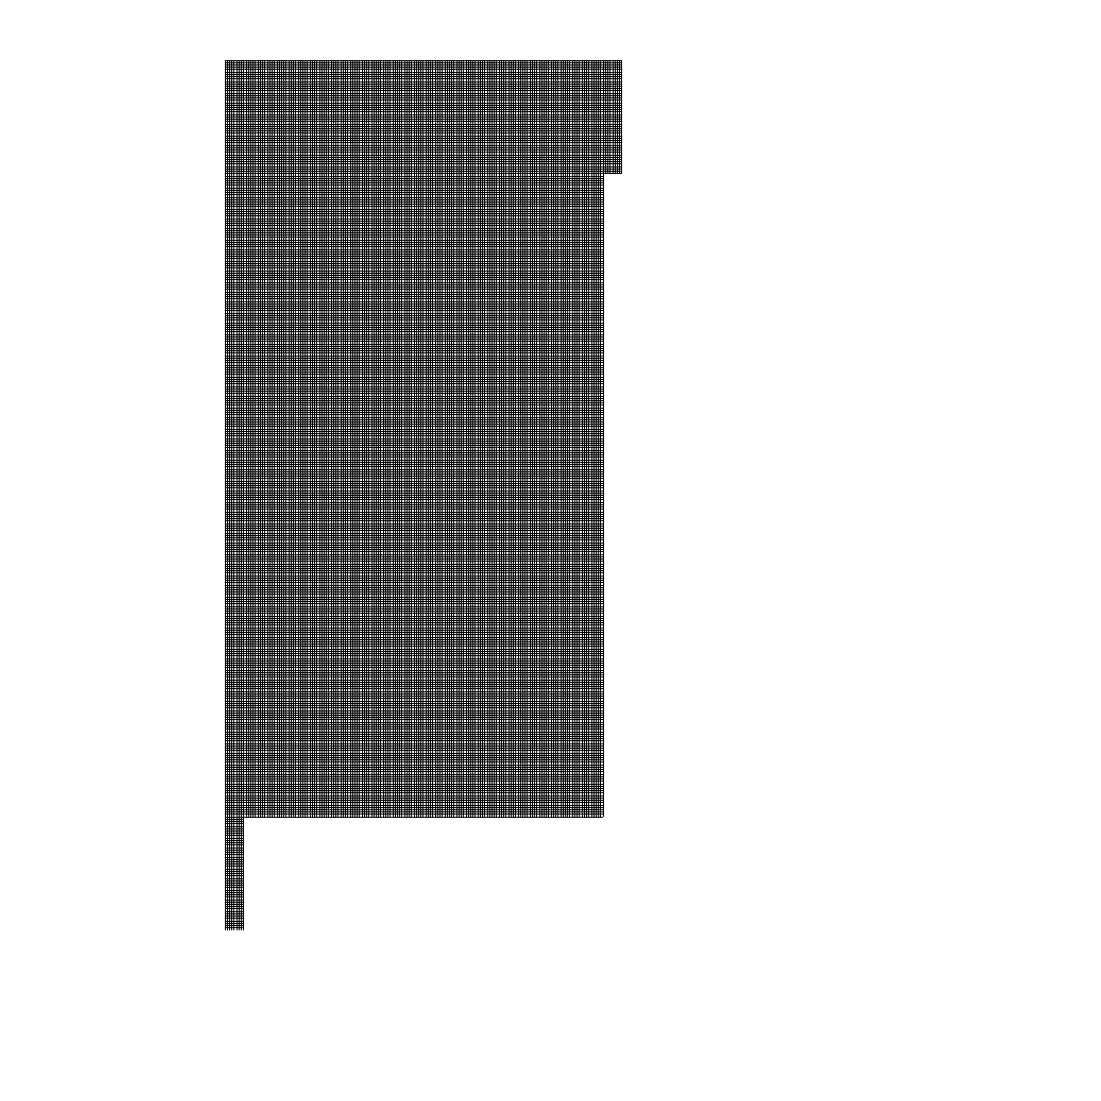

In [3]:
from trustutils import visit

a = visit.Show("MB_exp/Pb_Melange_Binaire.lata",'Mesh','dom',size=20)
a.visuOptions(["no_bounding_box","no_legend","no_databaseinfo","no_triad","no_axes"])
a.plot()

## Qualitative comparisons: Mass fraction vs temperature

We present first qualitative comparisons by comparing the masse fraction iso-contours (Pb melange binaire explicit) to those of the temperature (Pb thermo hydraulic explicit). As expected, both fields are identical (figures 3.1 and 3.2). Same observation is noted when a semi-implicit scheme is employed (figures 3.3 and 3.4).

### Mass fraction: explicit

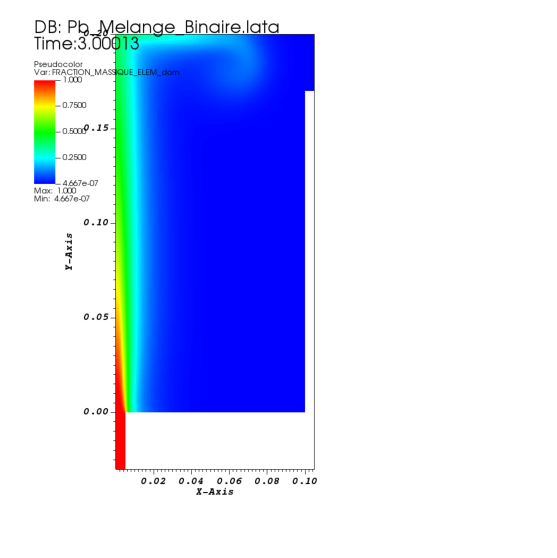

In [4]:
visit.showField("MB_exp/Pb_Melange_Binaire.lata","Pseudocolor","FRACTION_MASSIQUE_ELEM_dom",plotmesh=False)

### Temperature: explicit

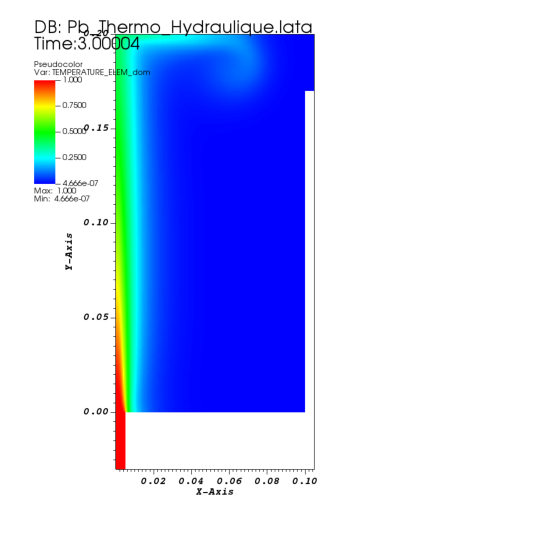

In [5]:
visit.showField("TH_exp/Pb_Thermo_Hydraulique.lata","Pseudocolor","TEMPERATURE_ELEM_dom",plotmesh=False)

### Mass fraction: semi_implicit

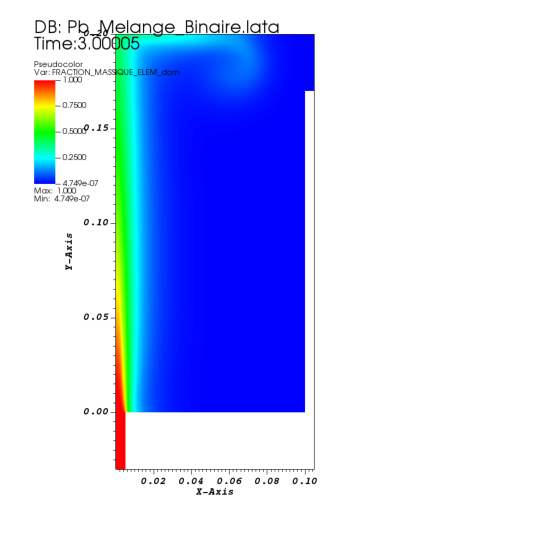

In [6]:
visit.showField("MB_semi_impl/Pb_Melange_Binaire.lata","Pseudocolor","FRACTION_MASSIQUE_ELEM_dom",plotmesh=False)

### Temperature: semi_implicit

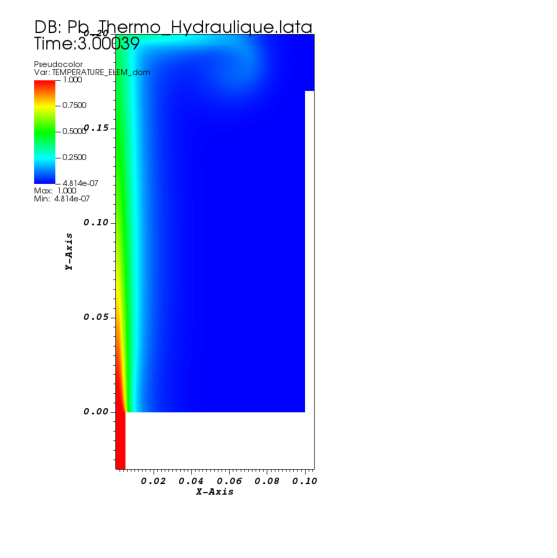

In [7]:
visit.showField("TH_semi_impl/Pb_Thermo_Hydraulique.lata","Pseudocolor","TEMPERATURE_ELEM_dom",plotmesh=False)

## Quantitative comparisons

### Total mass and energy

We consider now the integral quatities $I_1$ and $I_2$ in the four calculations. Clearly we note that all profiles perfectly match together where a linear evolution is reproduced in all cases. This behavior is expected as far as a continuous/constant flow rate is considered at the injection (see symbols on the same graph which depict the exact injected quantity).

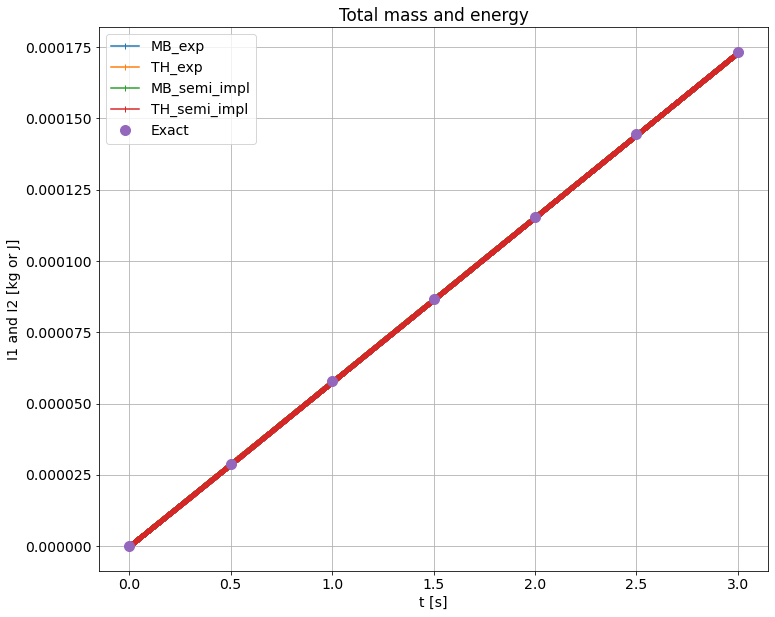

In [8]:
from trustutils import plot

a = plot.Graph("Total mass and energy")
a.addPoint("MB_exp/Pb_Melange_Binaire_INJ_MASS.son",label="MB_exp",marker="-|")
a.addPoint("TH_exp/Pb_Thermo_Hydraulique_INJ_MASS.son",label="TH_exp",marker="-|")
a.addPoint("MB_semi_impl/Pb_Melange_Binaire_INJ_MASS.son",label="MB_semi_impl",marker="-|")
a.addPoint("TH_semi_impl/Pb_Thermo_Hydraulique_INJ_MASS.son",label="TH_semi_impl",marker="-|")

x = plot.loadText("exact.d")
a.add(x[0],x[1],label='Exact',marker='o',markersize=10)
a.label("t [s]", "I1 and I2 [kg or J]")

a.visu()

### Mass fraction / temperature evolution

We present here the mass fraction and temperature evolution for a fixed probes located at $r= 0.5$ cm and $z=5$ cm. The profiles are identical in the four simulations.

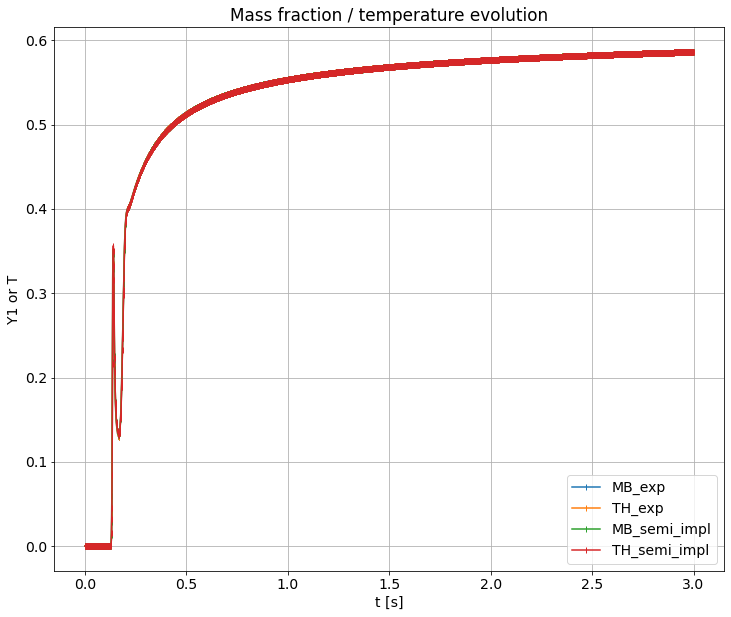

In [9]:
from trustutils import plot

a = plot.Graph("Mass fraction / temperature evolution")
a.addPoint("MB_exp/Pb_Melange_Binaire_PROBE.son",label="MB_exp",marker="-|")
a.addPoint("TH_exp/Pb_Thermo_Hydraulique_PROBE.son",label="TH_exp",marker="-|")
a.addPoint("MB_semi_impl/Pb_Melange_Binaire_PROBE.son",label="MB_semi_impl",marker="-|")
a.addPoint("TH_semi_impl/Pb_Thermo_Hydraulique_PROBE.son",label="TH_semi_impl",marker="-|")

a.label("t [s]", "Y1 or T")

a.visu()

### Mass fraction / temperature evolution

We present here the mass fraction and temperature evolution for a fixed probes located at $r= 0.5$ cm and $z=15$ cm. The profiles are identical in the four simulations.

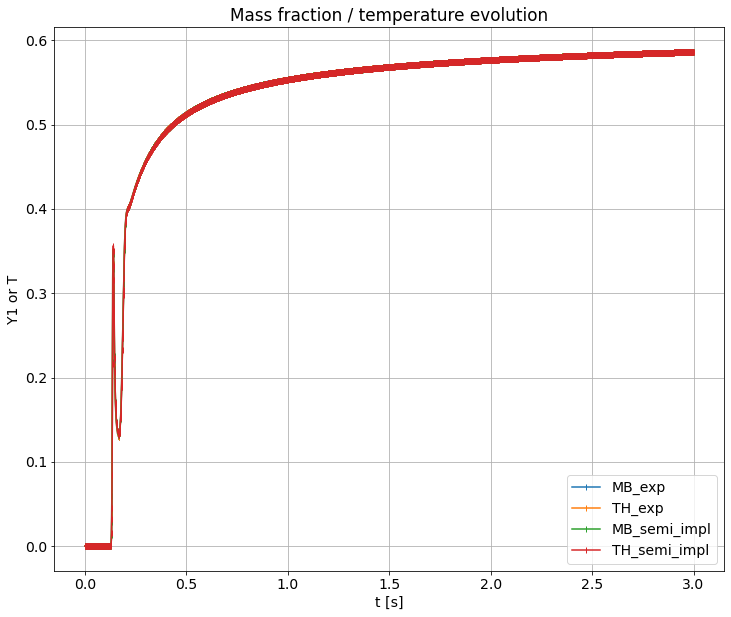

In [10]:
from trustutils import plot

a = plot.Graph("Mass fraction / temperature evolution")
a.addPoint("MB_exp/Pb_Melange_Binaire_PROBE.son",label="MB_exp",marker="-|")
a.addPoint("TH_exp/Pb_Thermo_Hydraulique_PROBE.son",label="TH_exp",marker="-|")
a.addPoint("MB_semi_impl/Pb_Melange_Binaire_PROBE.son",label="MB_semi_impl",marker="-|")
a.addPoint("TH_semi_impl/Pb_Thermo_Hydraulique_PROBE.son",label="TH_semi_impl",marker="-|")

a.label("t [s]", "Y1 or T")

a.visu()

### Time step

We consider now the evolution of the time step which is computed dynamically in the four calculations satisfying the stability criteria of the time scheme (facsec 0.9 used in all cases). We note also       that the evolution of dt is identical for both pair of simulations; either with explicit or semi-implicit calculations. It is important here to highlight the benefit of using a semi-implicit scheme where a the time step can be about 1.5 times larger than that used with the explicit simulation (as far as the diffusion time step is more important in such a problem).

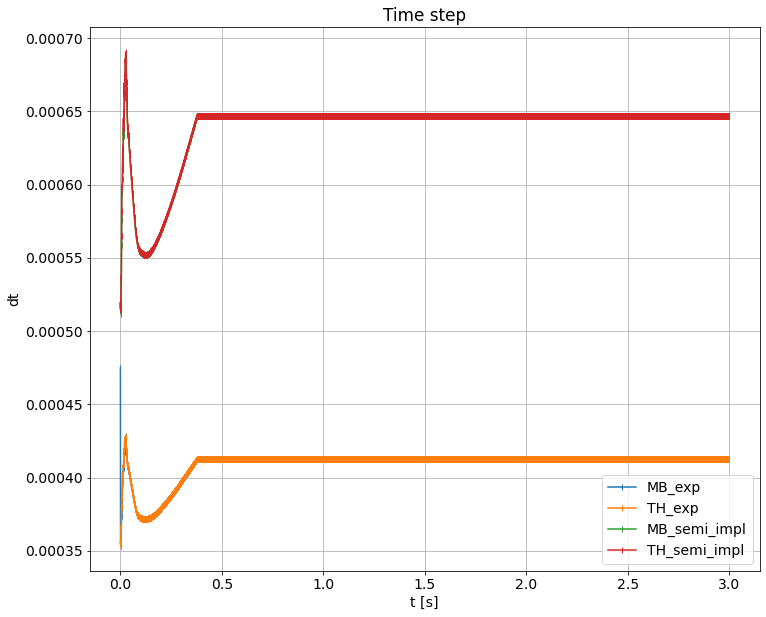

In [11]:
from trustutils import plot

a = plot.Graph("Time step")
a.addResidu("MB_exp/Pb_Melange_Binaire.dt_ev",label="MB_exp",marker="-|",var="dt")
a.addResidu("TH_exp/Pb_Thermo_Hydraulique.dt_ev",label="TH_exp",marker="-|",var="dt")
a.addResidu("MB_semi_impl/Pb_Melange_Binaire.dt_ev",label="MB_semi_impl",marker="-|",var="dt")
a.addResidu("TH_semi_impl/Pb_Thermo_Hydraulique.dt_ev",label="TH_semi_impl",marker="-|",var="dt")

a.label("t [s]", "dt")

### Volumic flow rate balance

Finally we consider the volumic flow rate balance where we can see that the balance is very well ensured in all cases at the precision of the machine.

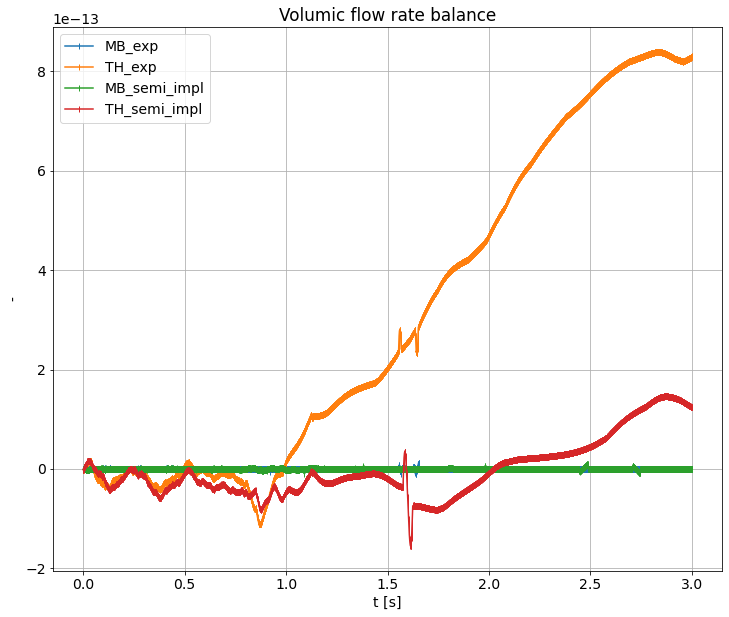

In [12]:
a = plot.Graph("Volumic flow rate balance")

x=plot.loadText("MB_exp/Pb_Melange_Binaire_pb_Debit.out")
a.add(x[0],x[5],label="MB_exp",marker="-|")

x=plot.loadText("TH_exp/Pb_Thermo_Hydraulique_pb_Debit.out")
a.add(x[0],x[5],label="TH_exp",marker="-|")

x=plot.loadText("MB_semi_impl/Pb_Melange_Binaire_pb_Debit.out")
a.add(x[0],x[5],label="MB_semi_impl",marker="-|")

x=plot.loadText("TH_semi_impl/Pb_Thermo_Hydraulique_pb_Debit.out")
a.add(x[0],x[5],label="TH_semi_impl",marker="-|")

a.label("t [s]", "-")

a.visu()

## Conclusions

We have presented in this document a validation concerning the TRUST binary mixture flow problem with a LMN approximation. Results show that considering two identical species reproduce exactly what is       obtained by a non-compressible thermo-hydraulic problem. Moreover, we show that the explicit and the semi-implicit time integration schemes lead to identical results if a good time step is used and can be safely used to reduce a bit the computational time

**Note :** the influence of the time step is not illustrated here but tested. In particular, higher facsec values ($>1$) lead to a stable solution but with different results.

In [13]:
run.tablePerf()

,host,system,Total CPU Time,CPU time/step,number of cells
MB_exp/Pb_Melange_Binaire,is244522,Linux,4480.58,0.611067,51968
TH_exp/Pb_Thermo_Hydraulique,is244522,Linux,4180.05,0.570097,51968
MB_semi_impl/Pb_Melange_Binaire,is244522,Linux,3386.52,0.720959,51968
TH_semi_impl/Pb_Thermo_Hydraulique,is244522,Linux,3140.33,0.668566,51968
Total,,,15187.48,,
